In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import math

print(tf.__version__)

2.7.0


In [2]:
# Define Constants
batch_size = 128
epochs = 10000
num_classes = 10

In [3]:
# Download MNIST dataset.
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
len(train_images), len(test_images)

(60000, 10000)

In [5]:
# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# Define the model architecture with CNN
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         # Hidden Layers 
                         # keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Reshape(target_shape=(28, 28, 1)),
                         keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
                         keras.layers.MaxPooling2D(pool_size=(2, 2)),
                         keras.layers.Dropout(0.25),
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation=tf.nn.relu),
                         keras.layers.Dropout(0.5),

                         keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
# Save the best model as digits_model.h5
filepath = 'digits_model.h5'
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True)

In [8]:
# Define a callback to monitor val_loss
monitorEarlyStop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [9]:
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[modelCheckpoint, monitorEarlyStop])

Epoch 1/10000


c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


469/469 [==============================] - 81s 172ms/step - loss: 0.2291 - accuracy: 0.9307 - val_loss: 0.0510 - val_accuracy: 0.9837
Epoch 2/10000
469/469 [==============================] - 88s 188ms/step - loss: 0.0808 - accuracy: 0.9758 - val_loss: 0.0385 - val_accuracy: 0.9869
Epoch 3/10000
469/469 [==============================] - 101s 214ms/step - loss: 0.0610 - accuracy: 0.9819 - val_loss: 0.0369 - val_accuracy: 0.9884
Epoch 4/10000
469/469 [==============================] - 65s 139ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0319 - val_accuracy: 0.9891
Epoch 5/10000
469/469 [==============================] - 90s 191ms/step - loss: 0.0431 - accuracy: 0.9863 - val_loss: 0.0306 - val_accuracy: 0.9899
Epoch 6/10000
469/469 [==============================] - 68s 145ms/step - loss: 0.0382 - accuracy: 0.9876 - val_loss: 0.0300 - val_accuracy: 0.9901
Epoch 7/10000
469/469 [==============================] - 69s 148ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0326 

In [10]:
# Save Model
savefile = 'saved_digits.h5'
model.save(savefile)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                        

In [13]:
# Load Model
load_model = tf.keras.models.load_model(savefile)

In [14]:
load_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                        

In [15]:
# Evaluate the model using test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0301 - accuracy: 0.9923
Test Accuracy:  0.9922999739646912


In [16]:
# Evaluate the load model using test dataset.
test_loss, test_acc = load_model.evaluate(test_images, test_labels)
print('Load model Test Accuracy: ', test_acc)

313/313 [==============================] - 5s 15ms/step - loss: 0.0301 - accuracy: 0.9923
Load model Test Accuracy:  0.9922999739646912


In [17]:
# Helper function to display digit images
def show_sample(images, labels, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  for i in range(sample_count):
    plt.subplot(grid_count, grid_count, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.xlabel(labels[i])
  plt.show()

# Helper function to display specific digit images
def show_sample_digit(images, labels, digit, sample_count=25):
  # Create a square with can fit {sample_count} images
  grid_count = math.ceil(math.ceil(math.sqrt(sample_count)))
  grid_count = min(grid_count, len(images), len(labels))
  
  plt.figure(figsize=(2*grid_count, 2*grid_count))
  i = 0
  digit_count = 0
  while digit_count < sample_count:
    i += 1
    if (digit == labels[i]):
      plt.subplot(grid_count, grid_count, digit_count+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(images[i], cmap=plt.cm.gray)
      plt.xlabel(labels[i])
      digit_count += 1
  plt.show()

# Helper function to display specific digit images
def show_digit_image(image):
  # Draw digit image
  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  # Major ticks every 20, minor ticks every 5
  major_ticks = np.arange(0, 29, 5)
  minor_ticks = np.arange(0, 29, 1)
  ax.set_xticks(major_ticks)
  ax.set_xticks(minor_ticks, minor=True)
  ax.set_yticks(major_ticks)
  ax.set_yticks(minor_ticks, minor=True)
  # And a corresponding grid
  ax.grid(which='both')
  # Or if you want different settings for the grids:
  ax.grid(which='minor', alpha=0.2)
  ax.grid(which='major', alpha=0.5)
  ax.imshow(image, cmap=plt.cm.binary)

  plt.show()

# Download the digit classification model if you're using Colab,
# or print the model's local path if you're not using Colab.
def download(path):
    try:
        from google.colab import files
        files.download(path)
    except ImportError:
        import os
        print('Error dowbload:', os.path.join(os,getcwd(), path))

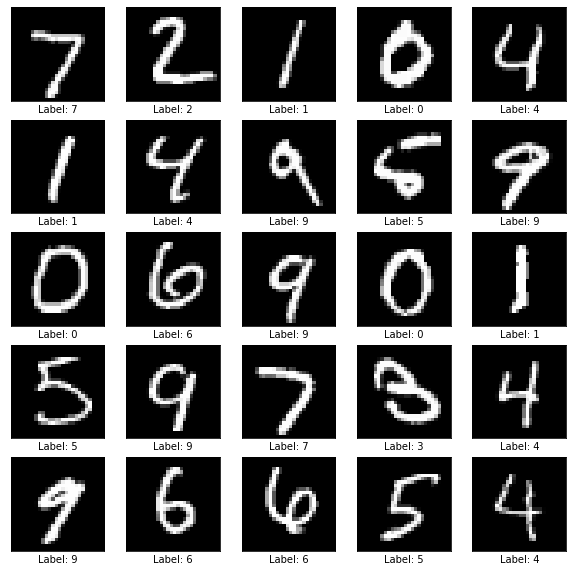

In [20]:
# Show the first 25 images in the training dataset.
show_sample(test_images, ['Label: %s' % label for label in test_labels])

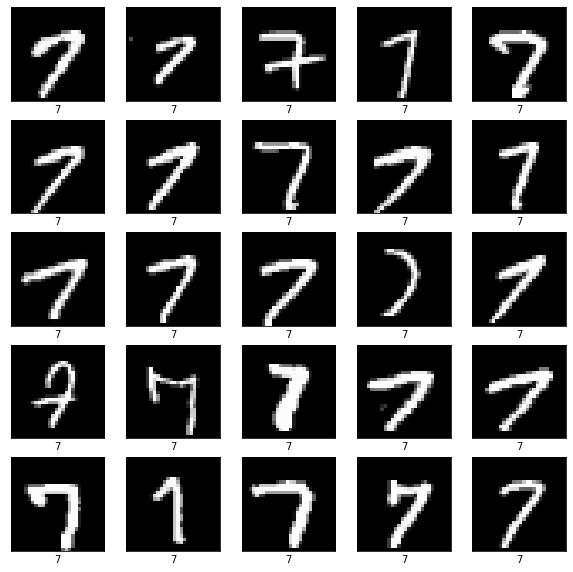

In [21]:
# Show digit 7 the first 25 images in the training dataset.
show_sample_digit(train_images, train_labels, 7)

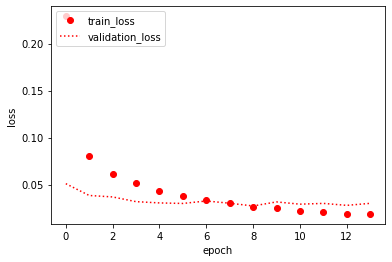

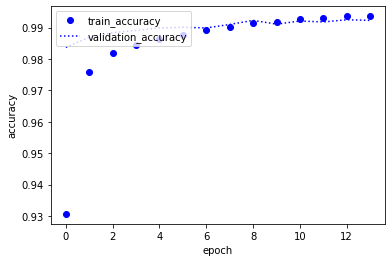

In [22]:
# Evaluate the model using test dataset. - Show performance

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train_loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='validation_loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train_accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='validation_accuracy')
acc_ax.set_xlabel('epoch')
acc_ax.set_ylabel('accuracy')

acc_ax.legend(loc='upper left')

plt.show()

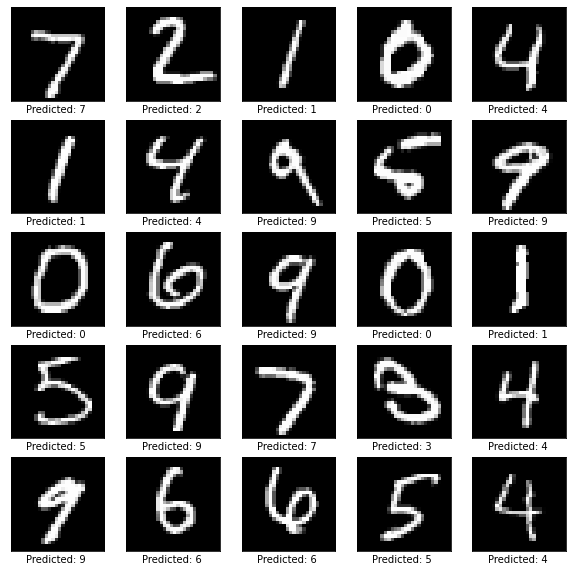

In [23]:
# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# Then plot the first 25 test images and their predicted labels.
show_sample(test_images, ['Predicted: %d ' % np.argmax(result) for result in predictions])

Number is  2


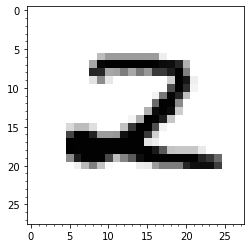

In [24]:
Digit = 8226 #@param {type:"slider", min:1, max:10000, step:1}
selected_digit = Digit - 1

result = predictions[selected_digit]
result_number = np.argmax(result)
print('Number is %2d' % result_number)

show_digit_image(test_images[selected_digit])